In [57]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [58]:
gdp_df = pd.read_csv('../../data/Eurostat/GDP/nama_10_gdp.tsv',sep='\t')

In [59]:
eu_codes = ['AT','BE','BG','HR','CY','CZ','DK','EE','FI','FR','DE','EL','HU','IE','IT','LV','LT','LU','MT','NL','PL','PT','RO','SK','SI','SE','ES','UK']

In [60]:
gdp_df.head()

,"unit,na_item,geo\time",2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
0,"CLV05_MEUR,B1G,AL",8909.9 e,8556.9 p,8237.4,7982.7,7805.2,7642.3,7557.0,7479.6,7249.6,...,:,:,:,:,:,:,:,:,:,:
1,"CLV05_MEUR,B1G,AT",275131.3,267384.8,260494.9,255381.6,252879.7,251167.1,250808.6,249489.2,241601.7,...,:,:,:,:,:,:,:,:,:,:
2,"CLV05_MEUR,B1G,BA",:,:,9807.7,9508.4,9222.9,9117.2,8902.9,8973.9,8881.6,...,:,:,:,:,:,:,:,:,:,:
3,"CLV05_MEUR,B1G,BE",331221.6,326357.4,320966.5,317067.9,311205.5,307201.7,306700.0,306103.6,299675.0,...,:,:,:,:,:,:,:,:,:,:
4,"CLV05_MEUR,B1G,BG",29379.0 p,28530.7,27387.3,26479.6,25741.9,25209.3,25206.1,25406.9,24883.4,...,:,:,:,:,:,:,:,:,:,:


In [61]:
gdp_df['country_code'] = gdp_df[r'unit,na_item,geo\time'].apply(lambda s: s.split(',')[-1])
gdp_df['na_item'] = gdp_df[r'unit,na_item,geo\time'].apply(lambda s: s.split(',')[1])
gdp_df['unit'] = gdp_df[r'unit,na_item,geo\time'].apply(lambda s: s.split(',')[0])

In [62]:
set(gdp_df.na_item)

{'B11',
 'B111',
 'B112',
 'B1G',
 'B1GQ',
 'B2A3G',
 'D1',
 'D11',
 'D12',
 'D2',
 'D21',
 'D21X31',
 'D2X3',
 'D3',
 'D31',
 'P3',
 'P31_S13',
 'P31_S14',
 'P31_S14_S15',
 'P31_S15',
 'P32_S13',
 'P3_P5',
 'P3_P6',
 'P3_S13',
 'P41',
 'P51G',
 'P52',
 'P52_P53',
 'P53',
 'P5G',
 'P6',
 'P61',
 'P62',
 'P7',
 'P71',
 'P72',
 'YA0',
 'YA1',
 'YA2'}

In [63]:
set(gdp_df.unit)

{'CLV05_MEUR',
 'CLV05_MNAC',
 'CLV10_MEUR',
 'CLV10_MNAC',
 'CLV_I05',
 'CLV_I10',
 'CLV_PCH_PRE',
 'CON_PPCH_PRE',
 'CP_MEUR',
 'CP_MNAC',
 'CP_MPPS',
 'CP_MPPS_EU27_2019',
 'PC_EU27_2019_MEUR_CP',
 'PC_EU27_2019_MPPS_CP',
 'PC_EU28_MEUR_CP',
 'PC_EU28_MPPS_CP',
 'PC_GDP',
 'PD05_EUR',
 'PD05_NAC',
 'PD10_EUR',
 'PD10_NAC',
 'PD_PCH_PRE_EUR',
 'PD_PCH_PRE_NAC',
 'PYP_MEUR',
 'PYP_MNAC'}

In [64]:
with open('EU_countries.json') as f:
    countries = json.load(f)['results']

In [65]:
countries

[{'id': '40', 'text': 'Austria'},
 {'id': '56', 'text': 'Belgium'},
 {'id': '100', 'text': 'Bulgaria'},
 {'id': '191', 'text': 'Croatia'},
 {'id': '196', 'text': 'Cyprus'},
 {'id': '203', 'text': 'Czechia'},
 {'id': '208', 'text': 'Denmark'},
 {'id': '233', 'text': 'Estonia'},
 {'id': '246', 'text': 'Finland'},
 {'id': '251', 'text': 'France'},
 {'id': '276', 'text': 'Germany'},
 {'id': '300', 'text': 'Greece'},
 {'id': '348', 'text': 'Hungary'},
 {'id': '372', 'text': 'Ireland'},
 {'id': '381', 'text': 'Italy'},
 {'id': '428', 'text': 'Latvia'},
 {'id': '440', 'text': 'Lithuania'},
 {'id': '442', 'text': 'Luxembourg'},
 {'id': '470', 'text': 'Malta'},
 {'id': '528', 'text': 'Netherlands'},
 {'id': '616', 'text': 'Poland'},
 {'id': '620', 'text': 'Portugal'},
 {'id': '642', 'text': 'Romania'},
 {'id': '703', 'text': 'Slovakia'},
 {'id': '705', 'text': 'Slovenia'},
 {'id': '752', 'text': 'Sweden'},
 {'id': '724', 'text': 'Spain'},
 {'id': '826', 'text': 'United Kingdom'}]

In [66]:
gdp_df.describe()

,"unit,na_item,geo\time",2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1981,1980,1979,1978,1977,1976,1975,country_code,na_item,unit
count,26349,26349,26349,26349,26349,26349,26349,26349,26349,26349,...,26349,26349,26349,26349,26349,26349,26349,26349,26349,26349
unique,26349,10212,12822,12993,12736,12856,12870,12834,11579,9979,...,1771,1686,1211,1216,1191,1209,1195,45,39,25
top,"PYP_MNAC,YA0,BE",:,:,0.1,0.1,0.1,0.1,0.1,0.1,100.000,...,:,:,:,:,:,:,:,CZ,B1GQ,CP_MEUR
freq,1,7018,854,503,522,515,509,462,467,1932,...,24162,24319,24902,24902,24902,24902,24955,641,1046,1581


In [67]:
gdp_df1 = gdp_df[gdp_df.country_code.isin(eu_codes)]
gdp_df1 = gdp_df1.query('na_item=="B1GQ" & unit=="CP_MEUR"')

In [68]:
gdp_df1.describe()

,"unit,na_item,geo\time",2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1981,1980,1979,1978,1977,1976,1975,country_code,na_item,unit
count,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
unique,28,28,28,28,28,28,28,28,28,28,...,5,5,4,4,4,4,4,28,1,1
top,"CP_MEUR,B1GQ,MT",202883.6 p,48989.5,170393.6,44605.9,150458.0,74169.9,389376.8,43164.6,187100.0,...,:,:,:,:,:,:,:,CZ,B1GQ,CP_MEUR
freq,1,1,1,1,1,1,1,1,1,1,...,24,24,25,25,25,25,25,1,28,28


In [69]:
for y in map(lambda x: '{} '.format(x),range(1999,2018)):
    gdp_df1[y] = gdp_df1[y].apply(lambda s: re.findall('(\d*\.?\d*)', s)[0] or np.nan).astype(float)

In [70]:
gdp_pc = gdp_df1[['country_code']+list(map(lambda x: '{} '.format(x),range(1999,2018)))]
gdp_pc.columns = ['country_code']+list(map(str,range(1999,2018)))

In [71]:
gdp_pc.to_csv('GDP_aggregate.csv',index=None)

In [65]:
country_codes = (gdp_df.country_code.drop_duplicates()).tolist()
[c for c in eu_codes if c not in country_codes]

['MT']

In [38]:
country_codes = list(set([c for c in gdp_df.country_code if 'EU' not in c and 'EA' not in c]))
len(country_codes)#, country_codes

39

In [48]:
grouped = gdp_df.groupby('country_code')['na_item','unit'].aggregate(['count', 'nunique']).loc[country_codes]#query(' | '.join(['country_code=="{}"'.format(c) for c in country_codes]))#
grouped.head()

na_item          unit        
               count nunique count nunique
country_code                              
LU               641      39   641      24
IE               641      39   641      24
MK               570      35   570      24
AL               573      29   573      24
UK               641      39   641      24

In [47]:
grouped[grouped['na_item']['nunique']>30]

na_item          unit        
               count nunique count nunique
country_code                              
LU               641      39   641      24
IE               641      39   641      24
MK               570      35   570      24
UK               641      39   641      24
BE               641      39   641      24
ES               601      37   601      24
SE               628      36   628      24
AT               641      39   641      24
DE               641      39   641      24
PL               633      37   633      24
SK               633      37   633      24
EL               631      37   631      24
BG               641      39   641      24
EE               641      39   641      24
FI               641      39   641      24
FR               641      39   641      24
HR               631      37   631      24
LV               641      39   641      24
NO               636      38   636      24
SI               641      39   641      24
BA               457      35   457      24
CY               641      39   641      24
CH               633      37   633      24
MT               576      38   576      24
CZ               641      39   641      24
LT               641      39   641      24
PT               641      39   641      24
NL               641      39   641      24
HU               636      38   636      24
DK               641      39   641      24
IS               606      38   606      24
RO               641      39   641      24
IT               641      39   641      24

In [77]:
gdp_df.query('unit=="CP_MEUR" & country_code=="AT" & (na_item=="B1GQ" or na_item=="B1G")')

,"unit,na_item,geo\time",2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1981,1980,1979,1978,1977,1976,1975,country_code,na_item,unit
6850,"CP_MEUR,B1G,AT",344838.9,329941.4,317593.0,307026.9,297230.2,288624.2,283548.2,276404.0,263633.5,...,:,:,:,:,:,:,:,AT,B1G,CP_MEUR
6895,"CP_MEUR,B1GQ,AT",386093.8,369899.2,356237.6,344258.5,333146.1,323910.2,318653.0,310128.7,295896.6,...,:,:,:,:,:,:,:,AT,B1GQ,CP_MEUR


In [91]:
yy = ["{} ".format(y) for y in range(1999,2019)]

In [106]:
import re

In [ ]:
pd.DataFrame.applymap

In [140]:
re.findall('(\d*\.?\d*)', ': ')[0] or 0

0

In [145]:
country_codes[2]

'MK'

In [157]:
s = gdp_df.query('unit=="CP_MEUR" & country_code=="MK" & na_item=="B1GQ"')[yy].T
s

,6925
1999,:
2000,4094.6
2001,4143.5
2002,4240.5
2003,4385.9
2004,4577.7
2005,5032.0
2006,5472.2
2007,6094.5
2008,6772.1


In [ ]:
s.rename

In [154]:
s = pd.Series({'s':[1,2,3]})
s.

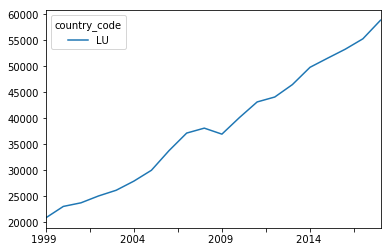

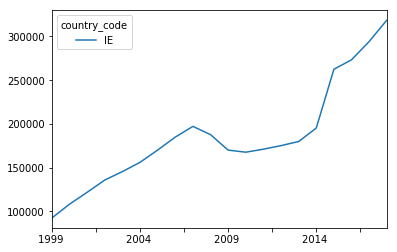

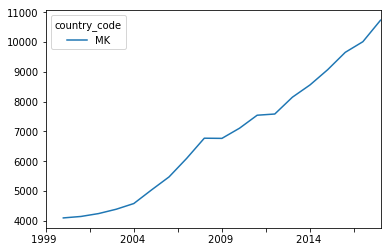

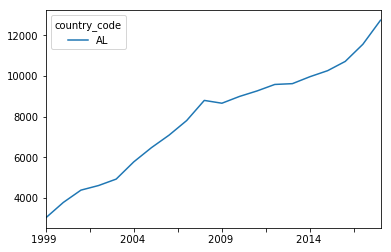

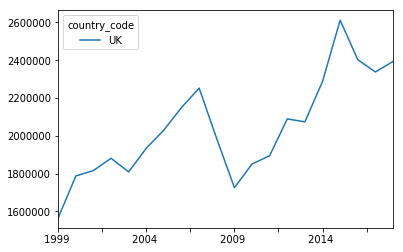

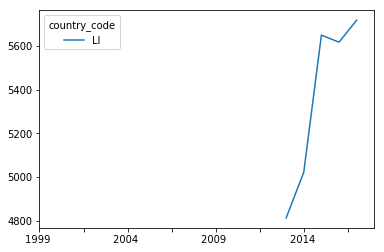

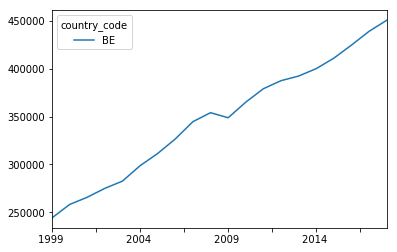

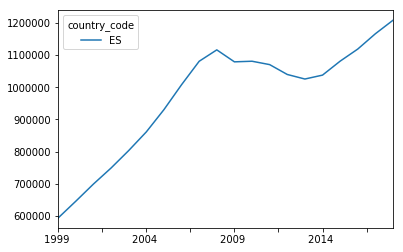

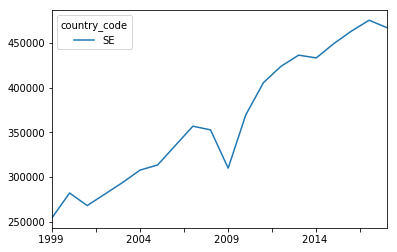

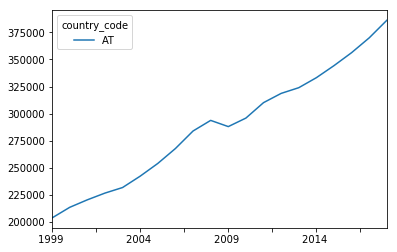

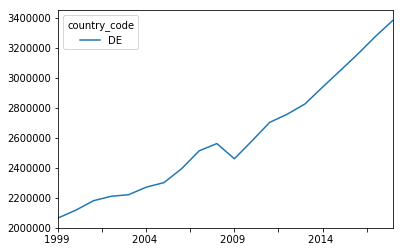

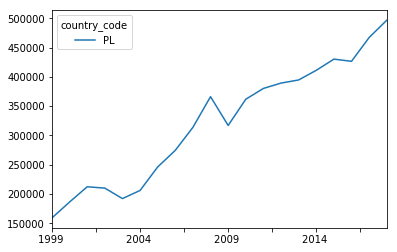

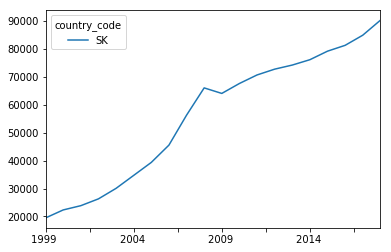

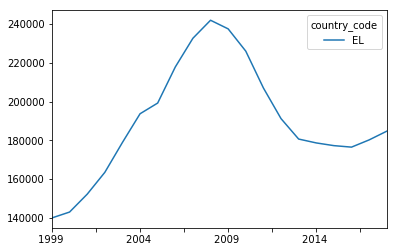

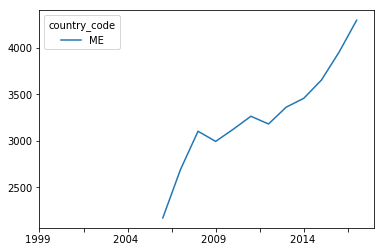

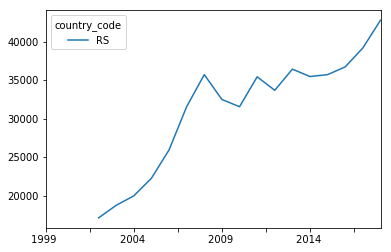

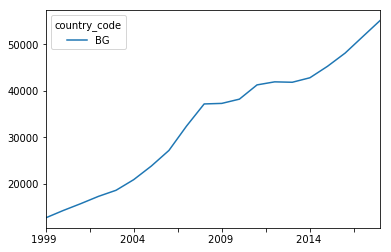

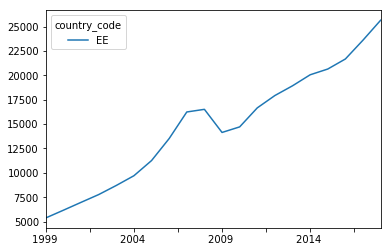

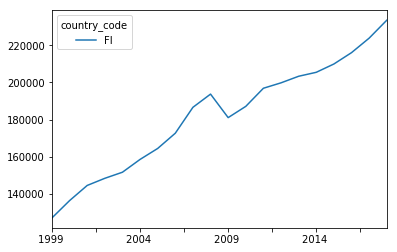

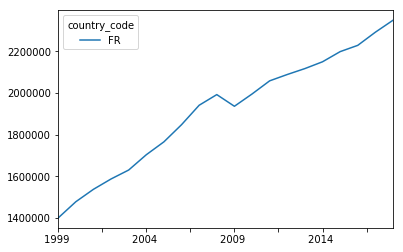

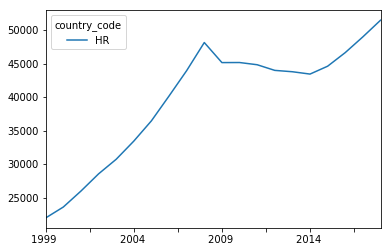

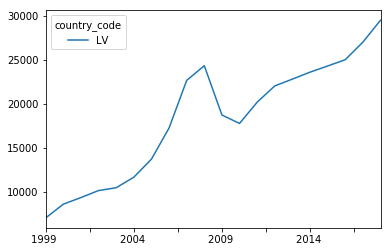

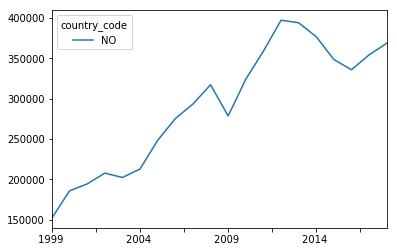

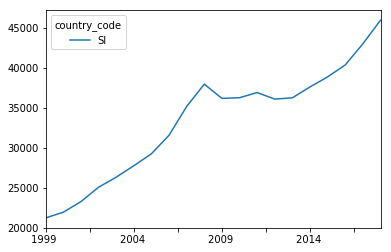

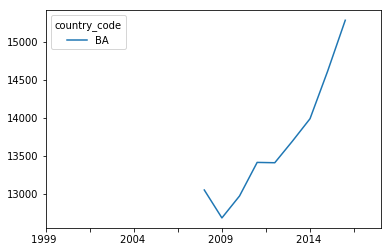

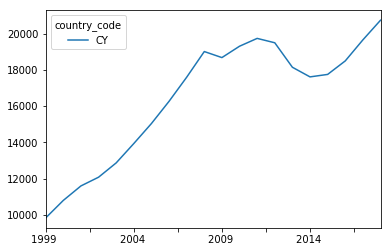

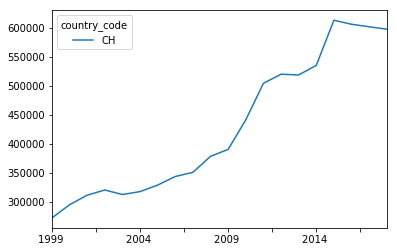

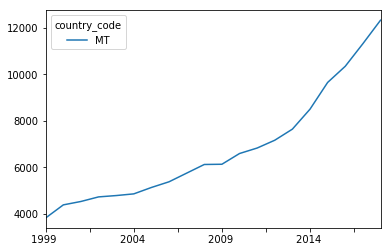

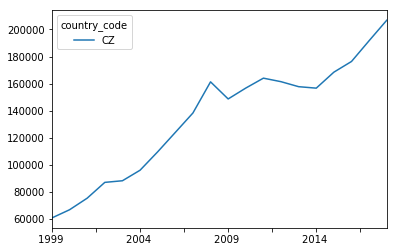

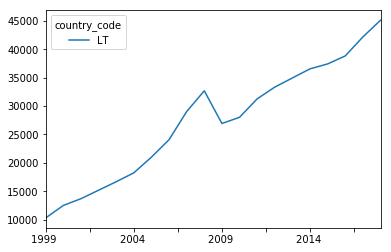

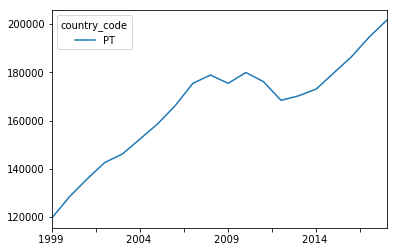

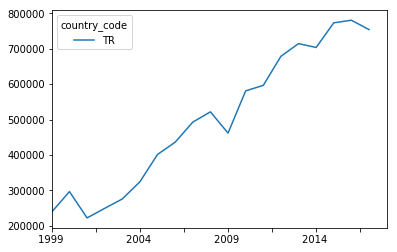

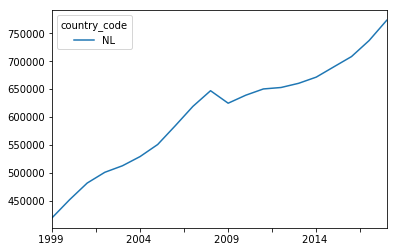

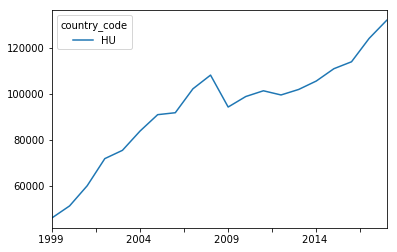

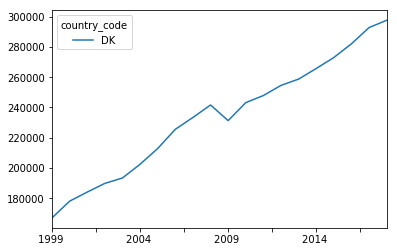

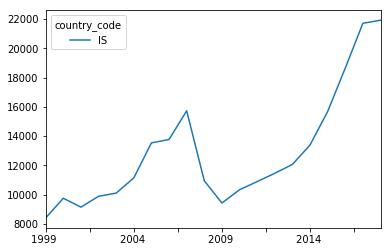

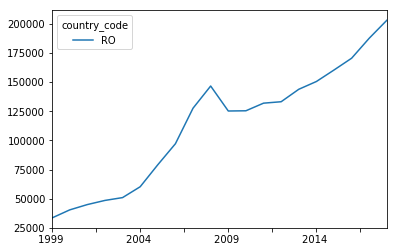

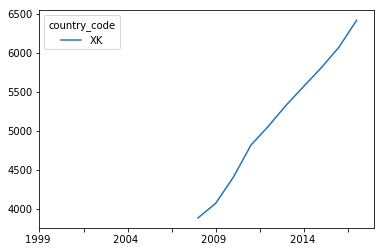

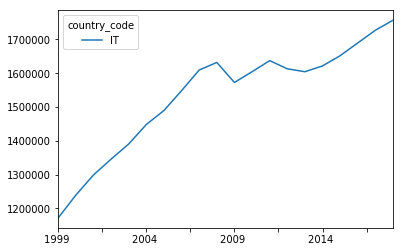

In [161]:
#fig, ax = plt.subplots()
df = gdp_df.set_index('country_code', drop=False)
for c in country_codes:
    s = df.query('unit=="CP_MEUR" & country_code==@c & na_item=="B1GQ"')[yy].T.applymap(lambda s: re.findall('(\d*\.?\d*)', s)[0] or np.nan).astype(float).plot()
#plt.legend()

In [7]:
gdp_df['1999 ']

0           4035.8 
1         198247.3 
2                : 
3         245627.4 
4          15007.9 
5         282642.5 
6          10175.9 
7          78145.2 
8        1938141.5 
9         164179.7 
10       6524742.9 
11       6667556.2 
12       6757406.2 
13          6529.8 
14        142295.3 
15        674758.6 
16       8603775.7 
17       7564600.9 
18       9106764.1 
19        120424.7 
20       1406039.7 
21         24136.2 
22         60814.1 
23        111295.7 
24         10208.6 
25       1237105.5 
26         12687.9 
27         21583.6 
28          7798.8 
29               : 
            ...    
26319            : 
26320          0.0 
26321            : 
26322          0.0 
26323          0.0 
26324          0.0 
26325          0.0 
26326         0.0 n
26327          0.0 
26328          0.0 
26329          0.0 
26330          0.0 
26331          0.0 
26332          0.0 
26333          0.0 
26334          0.0 
26335        383.3 
26336          0.0 
26337          0.0 


In [8]:
gdp_df

,"unit,na_item,geo\time",2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
0,"CLV05_MEUR,B1G,AL",8909.9 e,8556.9 p,8237.4,7982.7,7805.2,7642.3,7557.0,7479.6,7249.6,...,:,:,:,:,:,:,:,:,:,:
1,"CLV05_MEUR,B1G,AT",275131.3,267384.8,260494.9,255381.6,252879.7,251167.1,250808.6,249489.2,241601.7,...,:,:,:,:,:,:,:,:,:,:
2,"CLV05_MEUR,B1G,BA",:,:,9807.7,9508.4,9222.9,9117.2,8902.9,8973.9,8881.6,...,:,:,:,:,:,:,:,:,:,:
3,"CLV05_MEUR,B1G,BE",331221.6,326357.4,320966.5,317067.9,311205.5,307201.7,306700.0,306103.6,299675.0,...,:,:,:,:,:,:,:,:,:,:
4,"CLV05_MEUR,B1G,BG",29379.0 p,28530.7,27387.3,26479.6,25741.9,25209.3,25206.1,25406.9,24883.4,...,:,:,:,:,:,:,:,:,:,:
5,"CLV05_MEUR,B1G,CH",405528.4,395629.2,389102.5,383066.1,377869.3,368808.8,362016.3,357979.5,351479.6,...,:,:,:,:,:,:,:,:,:,:
6,"CLV05_MEUR,B1G,CY",15645.5 p,15061.0 p,14417.3,13755.4,13490.7,13669.9,14511.5,14941.5,14881.5,...,:,:,:,:,:,:,:,:,:,:
7,"CLV05_MEUR,B1G,CZ",135291.0,131308.2,125969.5,123029.6,117478.7,113615.3,114176.0,115146.8,112881.5,...,:,:,:,:,:,:,:,:,:,:
8,"CLV05_MEUR,B1G,DE",2557458.2,2521027.9,2467048.7,2413291.6,2377527.6,2325991.9,2313774.4,2300446.2,2221365.6,...,:,:,:,:,:,:,:,:,:,:
9,"CLV05_MEUR,B1G,DK",207378.8,204610.8,200370.0,195803.7,191638.3,188719.7,187000.9,186593.6,183751.9,...,116666.3,111899.2,109326.0,105277.0,105414.2,105455.3,101270.9,99054.8,97112.5,92152.9
